In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
from scipy.interpolate import interp1d
import csv


In [2]:
# tial Conditions

x0 = np.array([200.00, 5.00, 1.0, 0.0006, 0.37, 0.50])
lb = np.array([100.00, 0.00, 0.0, .000000007, .333, 0.20])
ub = np.array([700000.00, 100.00, 100.00, 0.7, 1.00, 1.00])
sigma1 = np.repeat(1e-4, 24)
refine_factor = 10



ydata = [
4.000000, 
0.000000, 
4.000000,
2.000000, 
3.000000,
3.000000,
12.000000, 
13.000000, 
21.000000,
36.000000, 
52.000000, 
52.000000, 
41.000000,
40.000000, 
13.000000, 
23.000000,
6.000000,
8.000000,
3.000000,
3.000000,
5.000000,
2.000000,
0.000000,
0.000000,
0.000000
]


INTERVAL = range(1, len(ydata))
WEEK = np.array(INTERVAL)
m = len(WEEK)

xdata = WEEK


In [3]:
# Define SEIR Equation
def sir_model(y, t, beta, sigma, gamma):

    S = -beta * y[0] * y[2]
    E = beta * y[0] * y[2] - sigma * y[1]
    I = sigma * y[1] - gamma * y[2]

    return S, E, I


def fit_odeint(t, p):
    print(p)
    print("+++++++++++++++++++++++++++++++++++++++++++++")
    z = integrate.odeint(sir_model, (p[0], p[1], p[2]), t, args=(p[3], p[4], p[5]))
    S1 = np.zeros(m)
    E1 = np.zeros(m)
    I1 = np.zeros(m)

    dt = (t.max() - t.min()) / (len(t))
    for i in range(m):
        if i == 0:
            S1[i] = z[i, 0];
            E1[i] = z[i, 1];
            I1[i] = z[i, 2]
        else:
            S1[i] = z[refine_factor * i - 1, 0]
            E1[i] = z[refine_factor * i - 1, 1]
            I1[i] = z[refine_factor * i - 1, 2]
    Y1 = -S1[1:(m)] - E1[1:(m)] + S1[0:(m - 1)] + E1[0:(m - 1)]
    return Y1


In [4]:

def r_resid(p):
    T = 0
    # for i in range(len(lb)):
    #    if p[i] < lb[i] or p[i] > ub[i]:
    #        T = 1
    t = np.linspace(WEEK.min(), WEEK.max(), refine_factor * (m - 1))
    Y2 = fit_odeint(t, p)
    a = Y2
    b = np.array(ydata[1:m])
    dist = np.linalg.norm((a - b), ord=1)
    print(T)
    T += 1
    return dist

data = ydata[1:m]
x = WEEK[1:m]
bounds = [(low, high) for low, high in zip(lb, ub)]

result = optimize.differential_evolution(r_resid, bounds)

[  5.43744599e+05   8.68596563e+01   1.16284369e+01   3.29272024e-01
   6.30983336e-01   4.76439534e-01]
+++++++++++++++++++++++++++++++++++++++++++++
0
[  2.57930006e+05   8.46684818e+01   1.48988753e+01   4.10031499e-01
   5.14582767e-01   5.35264555e-01]
+++++++++++++++++++++++++++++++++++++++++++++
0
[  4.21405777e+05   2.87751889e+00   9.48229693e+01   2.27523714e-01
   6.91025591e-01   6.14352388e-01]
+++++++++++++++++++++++++++++++++++++++++++++
0
[  5.60098597e+05   8.25490642e+01   9.98101366e+01   5.14221275e-01
   3.55206639e-01   6.93338319e-01]
+++++++++++++++++++++++++++++++++++++++++++++
0
[  2.39900321e+05   8.83173716e+01   9.78020784e+01   3.78961828e-01
   5.29041517e-01   3.68964446e-01]
+++++++++++++++++++++++++++++++++++++++++++++
0
[  2.26783927e+05   5.46275849e+01   4.89145264e+01   4.50135527e-02
   9.21138103e-01   9.70118653e-01]
+++++++++++++++++++++++++++++++++++++++++++++
0
[  6.39552761e+05   5.71190091e+01   5.63368884e+01   3.48814939e-01
   6.46128556

[  3.38355729e+02   6.26181752e-01   1.51394894e-02   7.63639827e-03
   4.44688931e-01   2.59774765e-01]
+++++++++++++++++++++++++++++++++++++++++++++
[  0.24535916   0.40502054   0.79681315   1.62616053   3.3034845
   6.58720131  12.65077209  22.65097206  36.          48.03431644
  51.97532624  46.17261294  35.46635434  24.96751179  16.79346866
  11.04525926   7.18512735   4.64803783   2.99794319   1.93054612
   1.24211573   0.79884627   0.51370491]


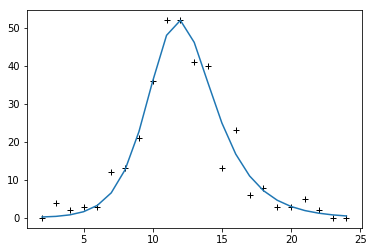

In [5]:
# res = optimize.fmin(r_resid, x0)
# fitted = fit_odeint(xdata, *popt)
t = np.linspace(WEEK.min(),WEEK.max(), refine_factor*(m-1))
Y1 = ydata
Y2  = fit_odeint(t, result.x)

print(Y2)
#z= fit_odeint(xdata,.0004,.3, .6)
#print(z[:,1])
plt.plot(xdata[1:m], Y1[1:m], '+k')
plt.plot(xdata[1:m], Y2)
plt.show()